 # Gender classification using keras API

In [1]:
import numpy as np  # Data manipulation
import pandas as pd # Dataframe manipulation 
import matplotlib.pyplot as plt # Plotting the data and the results
import matplotlib.image as mpimg # For displaying imagees
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Exploratory Data Analysis

### Declaring Variables

In [2]:
size = 249
target_size = (size,size,3)

## Preperaing First Dataset

we will do some data augmentation to both datasets

In [6]:
train_datagen1 = ImageDataGenerator(horizontal_flip=True,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   zoom_range=0.3,
                                   rotation_range=20,
                                   rescale=1./255)

train_gen1 = train_datagen1.flow_from_directory('train.csv',
                                              target_size=(size,size),
                                              batch_size=32,
                                              class_mode='binary')

NotADirectoryError: [WinError 267] The directory name is invalid: 'train.csv'

In [5]:
test_datagen1 = ImageDataGenerator(rescale=1./255)

test_gen1 = test_datagen1.flow_from_directory('test.csv',
                                              target_size=(size,size),
                                              batch_size=32,
                                              class_mode='binary')

NotADirectoryError: [WinError 267] The directory name is invalid: 'test.csv'

## Preperaing Second Dataset

In [ ]:
train_datagen2 = ImageDataGenerator(rescale=1./255,
                                    rotation_range=30,
                                    shear_range=0.3,
                                    zoom_range=0.3,
                                    horizontal_flip=True,
                                    #width_shift_range=0.4,
                                    #height_shift_range=0.4,
                                   )

train_gen2 =train_datagen2.flow_from_directory('../input/gender-recognition-200k-images-celeba/Dataset/Train',
                                            target_size=(size,size),
                                            batch_size=64,
                                            class_mode='binary')



In [ ]:
valid_datagen2 = ImageDataGenerator(rescale=1./255)

valid_gen2 = valid_datagen2.flow_from_directory('../input/gender-recognition-200k-images-celeba/Dataset/Validation',
                                                target_size=(size,size),
                                                batch_size=64,
                                                class_mode='binary')

### Observe the differences between two datasets

In [ ]:
fig,ax=plt.subplots(ncols=2,nrows=4,figsize=(20,20))
img1 = mpimg.imread('../input/gender-recognition-200k-images-celeba/Dataset/Train/Male/000007.jpg')
ax[0][0].imshow(img1)
ax[0][0].set_title("Second Dataset Examples")
img2 = mpimg.imread('../input/gender-classification-dataset/Validation/male/063453.jpg.jpg')
ax[0][1].imshow(img2)
ax[0][1].set_title("First Dataset Examples")
img3 =  mpimg.imread('../input/gender-recognition-200k-images-celeba/Dataset/Train/Male/000021.jpg')
ax[1][0].imshow(img3)
img4= mpimg.imread('../input/gender-classification-dataset/Validation/male/063495.jpg.jpg')
ax[1][1].imshow(img4)
img5 = mpimg.imread('../input/gender-recognition-200k-images-celeba/Dataset/Train/Male/000033.jpg')
ax[2][0].imshow(img5)
img6 = mpimg.imread('../input/gender-classification-dataset/Validation/male/063517.jpg.jpg')
ax[2][1].imshow(img6)
ax[3][0].imshow(mpimg.imread('../input/gender-recognition-200k-images-celeba/Dataset/Train/Female/000005.jpg'))
ax[3][1].imshow(mpimg.imread('../input/gender-classification-dataset/Validation/male/063531.jpg.jpg'))
plt.tight_layout()

# Model Building

In [ ]:
#base
model = Sequential()
model.add(Xception(include_top=False, pooling='avg', weights='imagenet', input_shape=target_size))
model.add(Flatten())
model.add(BatchNormalization())
#head
model.add(Dense(2048, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable = False

In [ ]:
model.summary()
model.compile(optimizer= 'Adam', loss = 'binary_crossentropy', metrics= 'accuracy')

# Training The Model on First Dataset

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
                                             save_best_only = True,
                                             monitor= 'val_accuracy',
                                             mode = 'max')

In [ ]:
epochs = 12
batch_size=256
history1 = model.fit(train_gen1, epochs= epochs, validation_data= test_gen1,
                    steps_per_epoch= len(train_gen1.filenames)//batch_size,
                    validation_steps= len(test_gen1.filenames)//batch_size,
                    callbacks= [checkpoint]
                    )

### Let's plot the Training vs Validation loss and accuracy graphs.

In [ ]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'ro', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.figure()

## Model Testing (1)

### Testing First Dataset

In [ ]:
test_loss, test_acc = model.evaluate(test_gen1, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

### Testing Second Dataset

In [ ]:
test_datagen2 = ImageDataGenerator(rescale=1./255)

test_gen2 = test_datagen2.flow_from_directory('../input/gender-recognition-200k-images-celeba/Dataset/Test',
                                              target_size=(size,size),
                                              batch_size=650,
                                              class_mode='binary')

In [ ]:
test_loss, test_acc = model.evaluate(test_gen2, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

# Training The Model on Second Dataset

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('xception_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
                                             save_best_only = True,
                                             monitor= 'val_accuracy',
                                             mode = 'max')

In [ ]:
epochs = 5 #should train for 10 epochs
batch_size=512
history2 = model.fit(train_gen2, epochs = epochs, validation_data = valid_gen2,
                    steps_per_epoch= len(train_gen2.filenames)//batch_size,
                    validation_steps= len(valid_gen2.filenames)//batch_size,
                    callbacks= [checkpoint]
                    )

## Model Testing (2)

### Testing First Dataset

In [ ]:
test_loss, test_acc = model.evaluate(test_gen1, steps=50)
print('test acc:', test_acc)
print('test_loss:',test_loss)

### Testing Second Dataset

In [ ]:
test_loss, test_acc = model.evaluate(test_gen2, steps=100)
print('test acc:', test_acc)
print('test_loss:',test_loss)

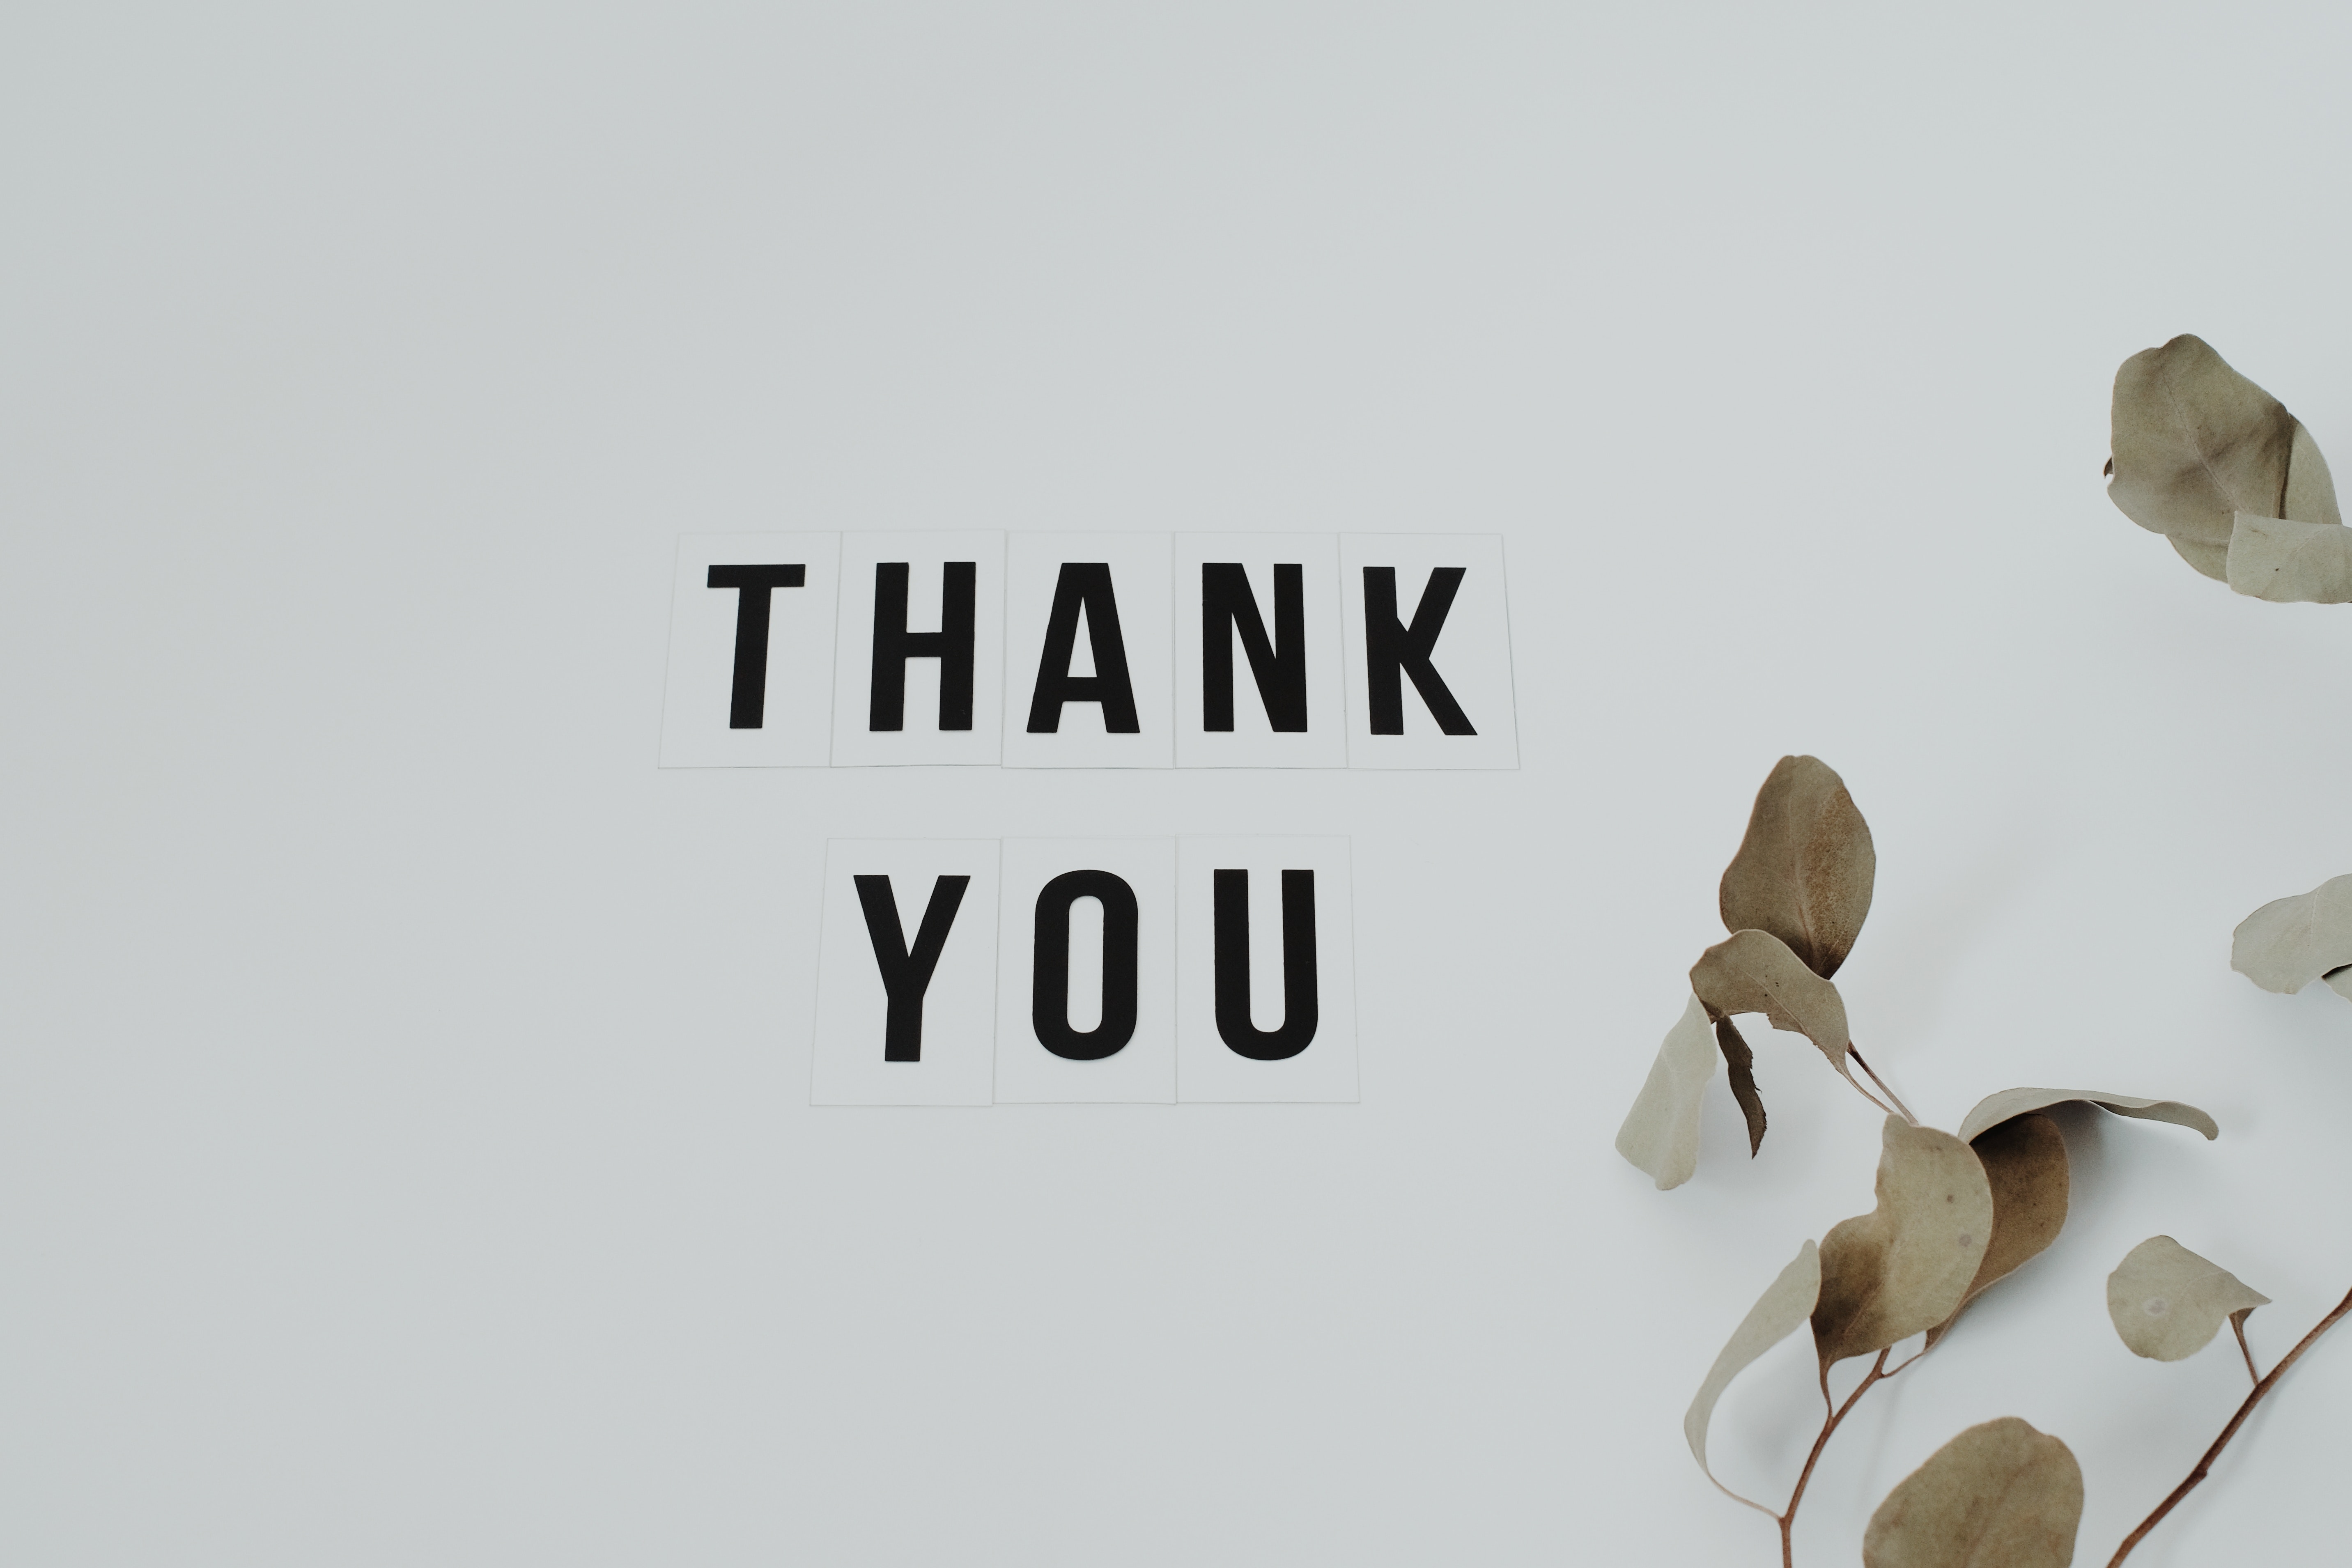